# Assignment 5, Question 6: Data Transformation

**Points: 20**

Transform and engineer features from the clinical trial dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, clean_data, transform_types, create_bins, fill_missing

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization functions for transformation analysis
def plot_distribution(series, title, figsize=(10, 6)):
    """
    Create a histogram of a numeric series.
    
    Args:
        series: pandas Series with numeric data
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    series.hist(bins=30)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_value_counts(series, title, figsize=(10, 6)):
    """
    Create a bar chart of value counts.
    
    Args:
        series: pandas Series with value counts
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    series.plot(kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Type Conversions (5 points)

1. Convert 'enrollment_date' to datetime using the `transform_types()` utility
2. Convert categorical columns ('site', 'intervention_group', 'sex') to category dtype
3. Ensure all numeric columns are proper numeric types
4. Display the updated dtypes

In [2]:
# TODO: Type conversions
# 1. Use transform_types() to convert enrollment_date to datetime
# 2. Convert categorical columns ('site', 'intervention_group', 'sex') to category dtype
# 3. Ensure all numeric columns are proper numeric types
# 4. Display the updated dtypes using df.dtypes
type_map = {
    'enrollment_date': 'datetime',
    'site': 'category',
    'intervention_group': 'category',
    'sex': 'category'}
    
df = transform_types(df, type_map)
print(df.dtypes)

patient_id                    object
age                            int64
sex                         category
bmi                          float64
enrollment_date       datetime64[ns]
systolic_bp                  float64
diastolic_bp                 float64
cholesterol_total            float64
cholesterol_hdl              float64
cholesterol_ldl              float64
glucose_fasting              float64
site                        category
intervention_group          category
follow_up_months               int64
adverse_events                 int64
outcome_cvd                   object
adherence_pct                float64
dropout                       object
dtype: object


## Part 2: Feature Engineering (8 points)

Create these new calculated columns:

1. `cholesterol_ratio` = cholesterol_ldl / cholesterol_hdl
2. `bp_category` = categorize systolic BP:
   - 'Normal': < 120
   - 'Elevated': 120-129
   - 'High': >= 130
3. `age_group` using `create_bins()` utility:
   - Bins: [0, 40, 55, 70, 100]
   - Labels: ['<40', '40-54', '55-69', '70+']
4. `bmi_category` using standard BMI categories:
   - Underweight: <18.5
   - Normal: 18.5-24.9
   - Overweight: 25-29.9
   - Obese: >=30

<class 'pandas.core.series.Series'>
Index(['patient_id', 'age', 'sex', 'bmi', 'enrollment_date', 'systolic_bp',
       'diastolic_bp', 'cholesterol_total', 'cholesterol_hdl',
       'cholesterol_ldl', 'glucose_fasting', 'site', 'intervention_group',
       'follow_up_months', 'adverse_events', 'outcome_cvd', 'adherence_pct',
       'dropout', 'cholesterol_ratio'],
      dtype='object')


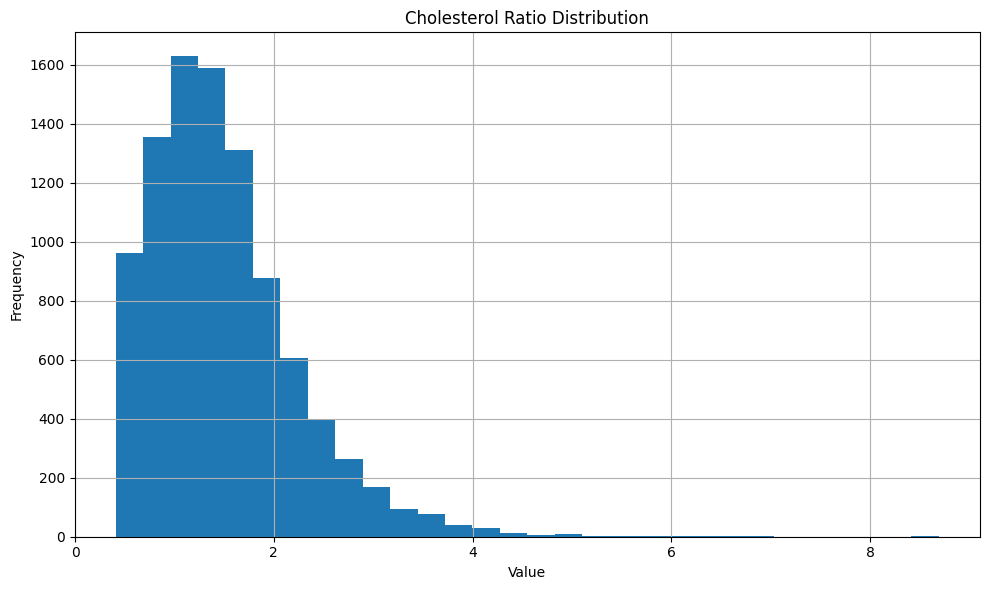

In [3]:
# TODO: Calculate cholesterol ratio
cholesterol_ratio = df['cholesterol_ldl'] / df['cholesterol_hdl']

print(type(cholesterol_ratio))
df['cholesterol_ratio'] = cholesterol_ratio
print(df.columns)
plot_distribution(df['cholesterol_ratio'], 'Cholesterol Ratio Distribution')

   systolic_bp bp_category
0        123.0    Elevated
1        139.0        High
2        123.0    Elevated
3        116.0      Normal
4         97.0      Normal
5        116.0      Normal
6        133.0        High
7        111.0      Normal
8          NaN         NaN
9        128.0    Elevated


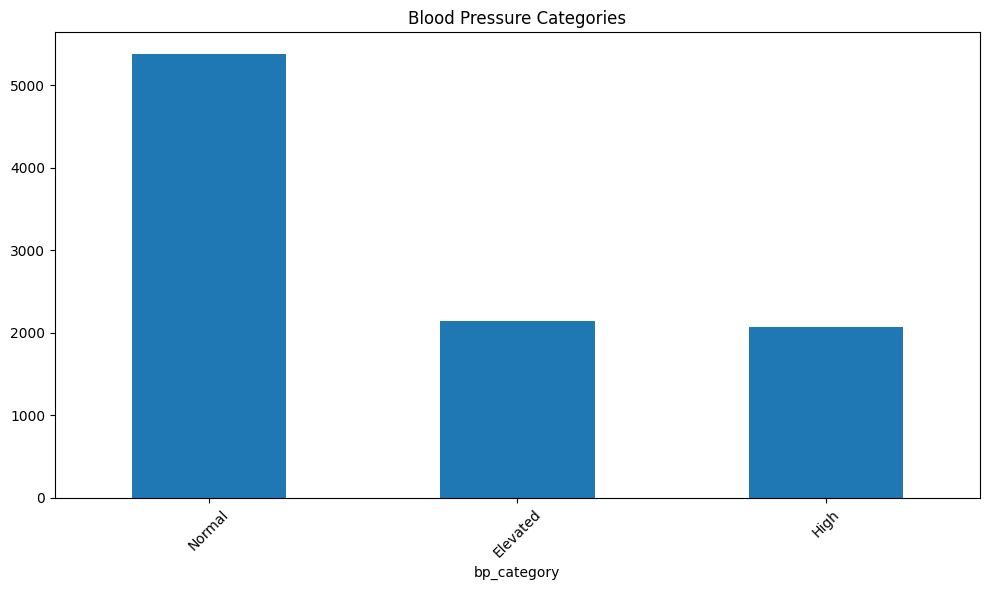

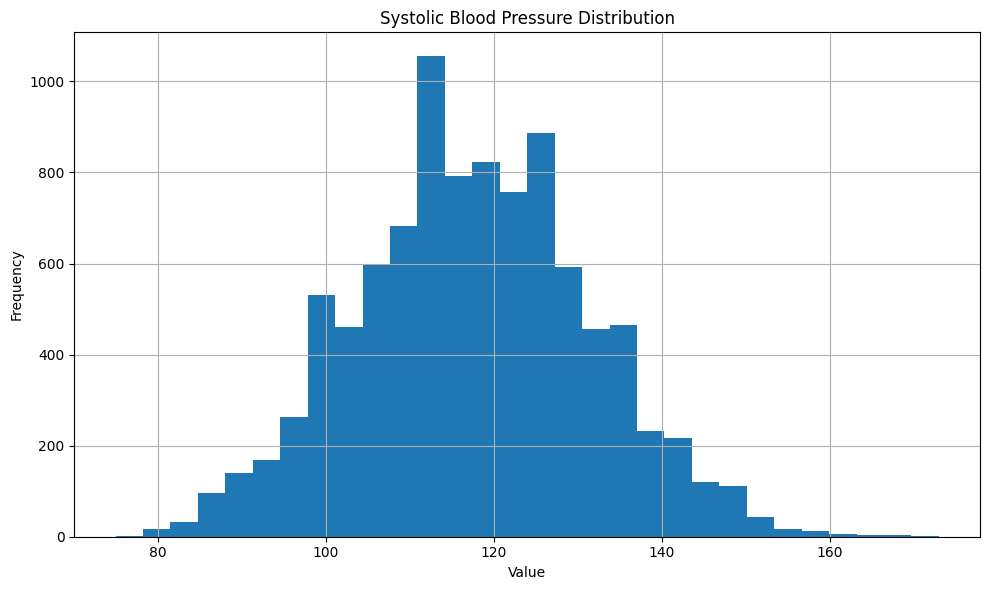

In [4]:
# TODO: Categorize blood pressure
df['bp_category'] = pd.cut(
        df['systolic_bp'],
        bins=[0, 120, 129, np.inf],
        labels=['Normal', 'Elevated', 'High'],
        right = False)

print(df[['systolic_bp', 'bp_category']].head(n=10))
plot_value_counts(df['bp_category'].value_counts(), 'Blood Pressure Categories')
plot_distribution(df['systolic_bp'], 'Systolic Blood Pressure Distribution')

**Note:** The `create_bins()` function has an optional `new_column` parameter. If you don't specify it, the new column will be named `{original_column}_binned`. You can use `new_column='age_group'` to give it a custom name.


    age age_group
0    80       70+
1    80       70+
2    82       70+
3    95       70+
4    95       70+
5    78       70+
6    84       70+
7    70       70+
8    92       70+
9    75       70+
10   79       70+
11   72       70+
12  100       70+
13  100       70+
14   64     55-69


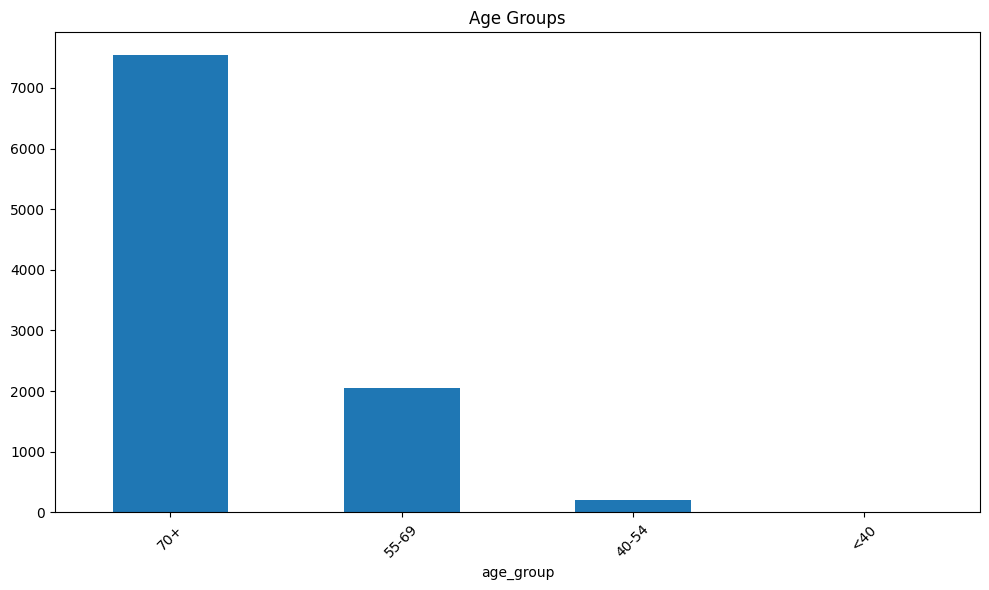

In [5]:
# TODO: Create age groups
df = create_bins(
    df,
    column='age',
    new_column='age_group',
    bins=[0, 40, 55, 70, np.inf],
    labels=['<40','40-54','55-69','70+'])
print(df[['age', 'age_group']].head(n=15))
plot_value_counts(df['age_group'].value_counts(), 'Age Groups')


       bmi bmi_category
9990  26.5   Overweight
9991  25.2   Overweight
9992  22.7       Normal
9993  20.8       Normal
9994  26.4   Overweight
9995  23.2       Normal
9996  28.9   Overweight
9997  23.8       Normal
9998  27.0   Overweight
9999  29.4   Overweight


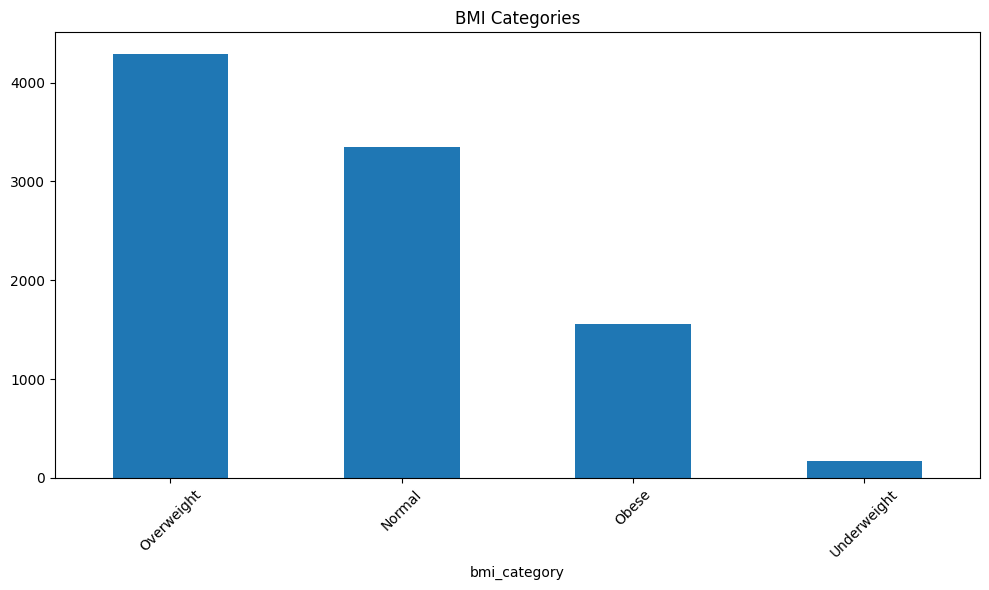

In [6]:
# TODO: Create BMI categories
bmi_category = pd.cut(
        df['bmi'],
        bins=[0, 18.4, 24.9, 29.9, np.inf],
        labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['bmi_category'] = bmi_category
print(df[['bmi', 'bmi_category']].tail(n=10))
plot_value_counts(df['bmi_category'].value_counts(), 'BMI Categories')

## Part 3: String Cleaning (2 points)

If there are any string columns that need cleaning:
1. Convert to lowercase
2. Strip whitespace
3. Replace any placeholder values

In [7]:
# TODO: String cleaning

df_clean = clean_data(df, sentinel_value=-999)
#print(df_clean.head())
df_clean['sex'] = df_clean['sex'].str.lower().str.strip()
df_clean['intervention_group'] = df_clean['intervention_group'].str.lower().str.strip()
df_clean['site'] = df_clean['site'].str.lower().str.strip()
df_clean['dropout'] = df_clean['dropout'].str.lower().str.strip()
df_clean['outcome_cvd'] = df_clean['outcome_cvd'].str.lower().str.strip()

df_clean['sex'] = df_clean['sex'].replace({"m": "male", "f": "female"})
df_clean['intervention_group'] = df_clean['intervention_group'].replace({"treatmen a": "treatment a",
                                                                          "treatmenta": "treatment a",
                                                                          "contrl": "control",
                                                                          "treatment  b": "treatment b"})
df_clean['site'] = df_clean['site'].replace({"site_d": "site d", "site  a": "site a"})


print(df_clean.dtypes)
print(df_clean['sex'].unique())
print(df_clean['intervention_group'].unique())
print(df_clean['site'].unique())
print(df_clean['dropout'].unique())
print(df_clean['outcome_cvd'].unique())

df_clean.to_csv('output/q6_cleaned_data.csv', index=False)


patient_id                    object
age                          float64
sex                           object
bmi                          float64
enrollment_date       datetime64[ns]
systolic_bp                  float64
diastolic_bp                 float64
cholesterol_total            float64
cholesterol_hdl              float64
cholesterol_ldl              float64
glucose_fasting              float64
site                          object
intervention_group            object
follow_up_months               int64
adverse_events                 int64
outcome_cvd                   object
adherence_pct                float64
dropout                       object
cholesterol_ratio            float64
bp_category                 category
age_group                   category
bmi_category                category
dtype: object
['female' 'male']
['control' 'treatment b' 'treatment a']
['site b' 'site a' 'site c' 'site d' 'site e']
['no' 'yes']
['no' 'yes']


## Part 4: One-Hot Encoding (5 points)

Create dummy variables for categorical columns:
1. One-hot encode 'intervention_group' using `pd.get_dummies()`
2. One-hot encode 'site'
3. Drop the original categorical columns
4. Show the new shape and column names

In [8]:
# TODO: One-hot encoding
df_clean = pd.get_dummies(
    df_clean,
    columns=['intervention_group', 'site'],
    prefix=['intervention_group', 'site'])
print(df_clean.shape)
print(df_clean.columns)

(10000, 28)
Index(['patient_id', 'age', 'sex', 'bmi', 'enrollment_date', 'systolic_bp',
       'diastolic_bp', 'cholesterol_total', 'cholesterol_hdl',
       'cholesterol_ldl', 'glucose_fasting', 'follow_up_months',
       'adverse_events', 'outcome_cvd', 'adherence_pct', 'dropout',
       'cholesterol_ratio', 'bp_category', 'age_group', 'bmi_category',
       'intervention_group_control', 'intervention_group_treatment a',
       'intervention_group_treatment b', 'site_site a', 'site_site b',
       'site_site c', 'site_site d', 'site_site e'],
      dtype='object')


## Part 5: Save Transformed Data

Save the fully transformed dataset to `output/q6_transformed_data.csv`

In [9]:
# TODO: Save transformed data
# df_transformed.to_csv('output/q6_transformed_data.csv', index=False)
df_clean.to_csv('output/q6_transformed_data.csv', index=False)